### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

plt.style.use("dark_background")

### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [36]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [38]:
def assignProfile(gpa):
    
    if 0 <= gpa < 2:
        return 'Low'
    
    elif 2 <= gpa <= 3.5:
        return 'Medium'
    
    elif 3.5 < gpa <= 5:
        return 'High'

In [39]:
data["Profile"] = data["GPA"].apply(assignProfile)

In [40]:
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,Medium
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,Medium
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,Low
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

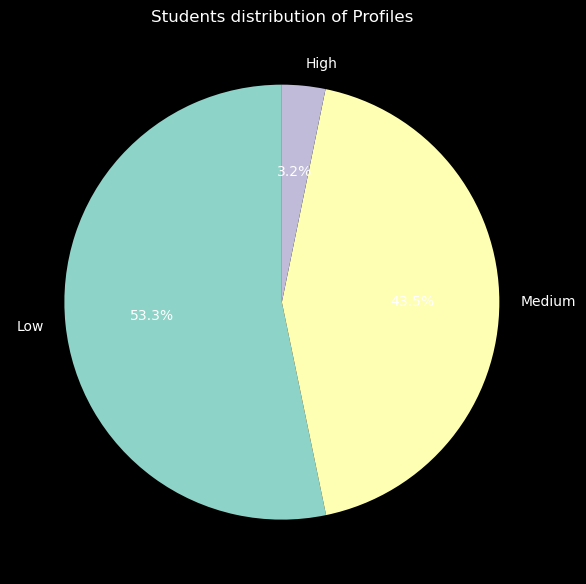

In [41]:
profile_counts = data["Profile"].value_counts()

plt.figure(figsize = (6, 6))

plt.pie(profile_counts, labels = profile_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title("Students distribution of Profiles")

plt.tight_layout()
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [42]:
label_encoder = LabelEncoder()

data["Profile"] = label_encoder.fit_transform(data["Profile"])

In [43]:
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,2
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,2
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,2
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,2
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,1
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,1


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

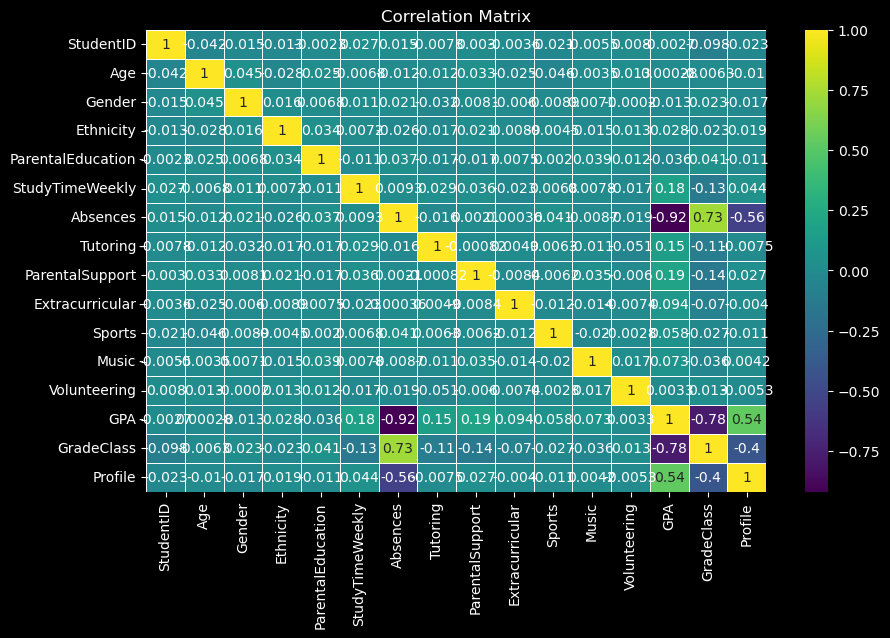

In [44]:
mat_corr = data.corr()

plt.figure(figsize = (10, 6))

sns.heatmap(mat_corr, annot = True, cmap = "viridis", linewidths = 0.5)

plt.title("Correlation Matrix")

plt.tight_layout
plt.show()

In [45]:
dataset = data.drop(["StudentID", "Age", "Gender", "Ethnicity"], axis = 1)

In [46]:
X = dataset.drop(["Profile"], axis = 1)
y = dataset["Profile"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [48]:
input_dim = X_train_scaled.shape[1]

num_classes = len(set(y_train))

model = Sequential()
model.add(Dense(64, input_dim = input_dim, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))

### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [49]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [50]:
history = model.fit(X_train_scaled, y_train, 
                    epochs = 50,
                    batch_size = 10,
                    validation_split = 0.2) 

Epoch 1/50
153/153 [==============================] - 1s 2ms/step - loss: 0.5158 - accuracy: 0.8392 - val_loss: 0.2430 - val_accuracy: 0.9243
Epoch 2/50
153/153 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.9484 - val_loss: 0.1569 - val_accuracy: 0.9426
Epoch 3/50
153/153 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9556 - val_loss: 0.1245 - val_accuracy: 0.9530
Epoch 4/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9660 - val_loss: 0.1035 - val_accuracy: 0.9530
Epoch 5/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9732 - val_loss: 0.0869 - val_accuracy: 0.9608
Epoch 6/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9758 - val_loss: 0.0768 - val_accuracy: 0.9817
Epoch 7/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9843 - val_loss: 0.0725 - val_accuracy: 0.9765
Epoch 

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

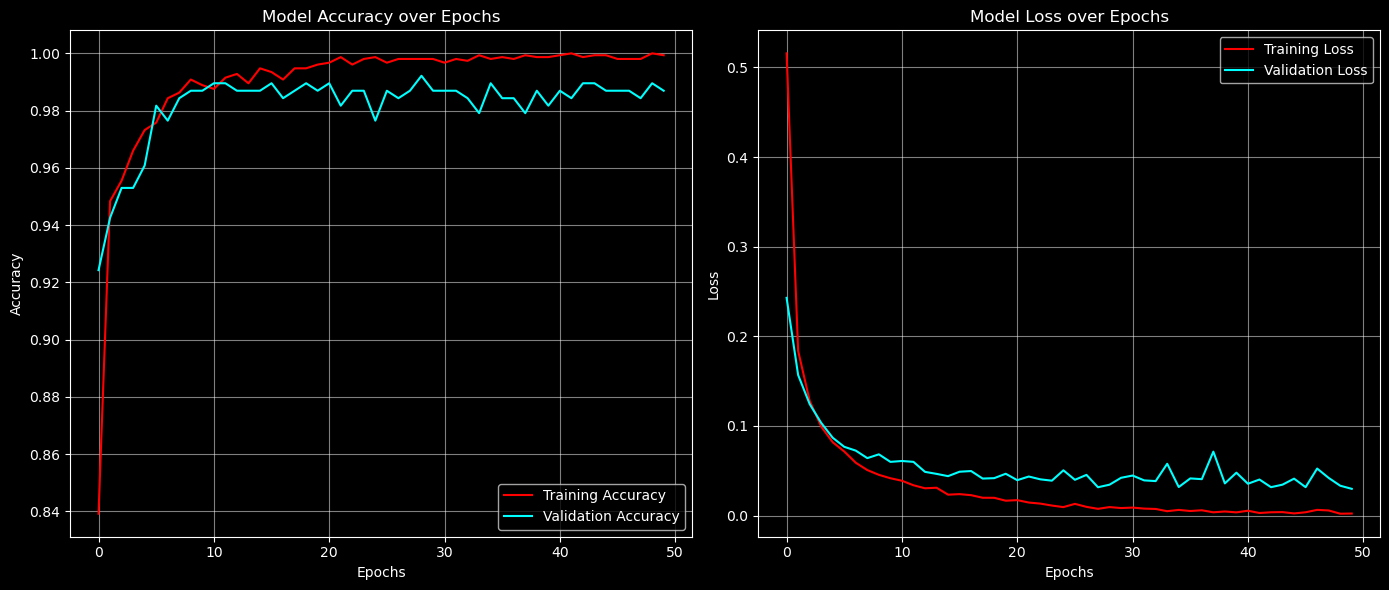

In [51]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label = "Training Accuracy", color = "red")
plt.plot(val_accuracy, label = "Validation Accuracy", color = "cyan")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Epochs")
plt.legend()

plt.grid(True, alpha = 0.5)

plt.subplot(1, 2, 2)
plt.plot(loss, label = "Training Loss", color = "red")
plt.plot(val_loss, label = "Validation Loss", color = "cyan")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss over Epochs")
plt.legend()

plt.grid(True, alpha = 0.5)

plt.tight_layout()
plt.show()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [52]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

15/15 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9749
Test Loss: 0.1112515777349472
Test Accuracy: 0.9749478101730347


### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [53]:
y_pred = model.predict(X_test_scaled)

y_pred_classes = y_pred.argmax(axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test)

print("Predicted vs Actual values:")
for pred, actual in zip(y_pred_labels, y_test_labels):
    print(f"Predicted: {pred}, Actual: {actual}")

15/15 [==============================] - 0s 880us/step
Predicted vs Actual values:
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Me

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [54]:
dataset2 = data.drop(["StudentID", "Age", "Volunteering"], axis = 1)

dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             2392 non-null   int64  
 1   Ethnicity          2392 non-null   int64  
 2   ParentalEducation  2392 non-null   int64  
 3   StudyTimeWeekly    2392 non-null   float64
 4   Absences           2392 non-null   int64  
 5   Tutoring           2392 non-null   int64  
 6   ParentalSupport    2392 non-null   int64  
 7   Extracurricular    2392 non-null   int64  
 8   Sports             2392 non-null   int64  
 9   Music              2392 non-null   int64  
 10  GPA                2392 non-null   float64
 11  GradeClass         2392 non-null   float64
 12  Profile            2392 non-null   int32  
dtypes: float64(3), int32(1), int64(9)
memory usage: 233.7 KB


In [55]:
X2 = dataset2.drop('Profile', axis = 1)
y2 = dataset2['Profile']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [56]:
scaler = StandardScaler()

X_train_scaled2 = scaler.fit_transform(X_train2)

X_test_scaled2 = scaler.transform(X_test2)

In [57]:
input_dim = X_train_scaled2.shape[1]
num_classes = len(set(y_train2))

model2 = Sequential()
model2.add(Dense(128, input_dim = input_dim, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(num_classes, activation = "softmax"))

model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [58]:
history = model2.fit(X_train_scaled2, y_train2,
                     epochs = 50,
                     batch_size = 10, 
                     validation_split = 0.2)

Epoch 1/50
153/153 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8817 - val_loss: 0.1416 - val_accuracy: 0.9556
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9484 - val_loss: 0.1340 - val_accuracy: 0.9426
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.1011 - val_accuracy: 0.9608
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0740 - val_accuracy: 0.9661
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.0686 - val_accuracy: 0.9713
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9882 - val_loss: 0.0796 - val_accuracy: 0.9634
Epoch 7/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9876 - val_loss: 0.0523 - val_accuracy: 0.9765
Epoch 

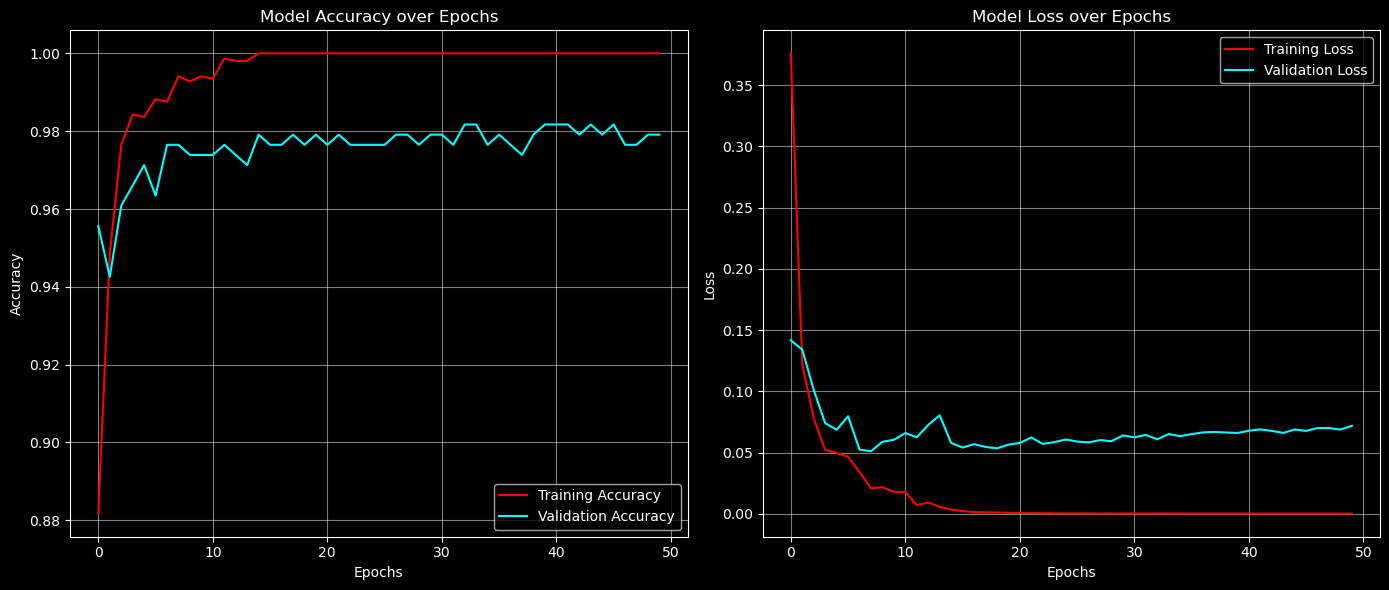

In [59]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label = "Training Accuracy", color = "red")
plt.plot(val_accuracy, label = "Validation Accuracy", color = "cyan")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Epochs")
plt.legend()

plt.grid(True, alpha = 0.5)

plt.subplot(1, 2, 2)
plt.plot(loss, label = "Training Loss", color = "red")
plt.plot(val_loss, label = "Validation Loss", color = "cyan")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss over Epochs")
plt.legend()

plt.grid(True, alpha = 0.5)

plt.tight_layout()
plt.show()

In [60]:
test_loss, test_acc = model2.evaluate(X_test_scaled2, y_test2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

15/15 [==============================] - 0s 891us/step - loss: 0.1111 - accuracy: 0.9812
Test Loss: 0.11111176759004593
Test Accuracy: 0.9812108278274536


In [61]:
y_pred2 = model2.predict(X_test_scaled2)
y_pred_classes2 = y_pred2.argmax(axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred_classes2)
y_test_labels = label_encoder.inverse_transform(y_test2)

print("Predicted vs Actual values:")
for pred, actual in zip(y_pred_labels, y_test_labels):
    print(f"Predicted: {pred}, Actual: {actual}")

15/15 [==============================] - 0s 940us/step
Predicted vs Actual values:
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Me

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [62]:
dataset3 = data.drop(["StudentID", "Age", "Gender", "Ethnicity", "Volunteering"], axis = 1)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   int64  
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   int64  
 3   Tutoring           2392 non-null   int64  
 4   ParentalSupport    2392 non-null   int64  
 5   Extracurricular    2392 non-null   int64  
 6   Sports             2392 non-null   int64  
 7   Music              2392 non-null   int64  
 8   Volunteering       2392 non-null   int64  
 9   GPA                2392 non-null   float64
 10  GradeClass         2392 non-null   float64
 11  Profile            2392 non-null   int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 215.0 KB


In [63]:
X3 = dataset3.drop('Profile', axis = 1)
y3 = dataset3['Profile']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [64]:
scaler = StandardScaler()

X_train_scaled3 = scaler.fit_transform(X_train3)

X_test_scaled3 = scaler.transform(X_test3)

In [65]:
input_dim = X_train_scaled3.shape[1]
num_classes = len(set(y_train3))

model3 = Sequential()
model3.add(Dense(64, input_dim = input_dim, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(num_classes, activation = "softmax"))

model3.compile(optimizer = RMSprop(learning_rate = 0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [66]:
history = model3.fit(X_train_scaled3, y_train3,
                     epochs = 50,
                     batch_size = 10, 
                     validation_split = 0.2)

Epoch 1/50
153/153 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.8830 - val_loss: 0.2038 - val_accuracy: 0.9452
Epoch 2/50
153/153 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9497 - val_loss: 0.1325 - val_accuracy: 0.9556
Epoch 3/50
153/153 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9588 - val_loss: 0.0988 - val_accuracy: 0.9608
Epoch 4/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9719 - val_loss: 0.0878 - val_accuracy: 0.9713
Epoch 5/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9739 - val_loss: 0.0690 - val_accuracy: 0.9713
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9804 - val_loss: 0.0593 - val_accuracy: 0.9765
Epoch 7/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0568 - val_accuracy: 0.9791
Epoch 

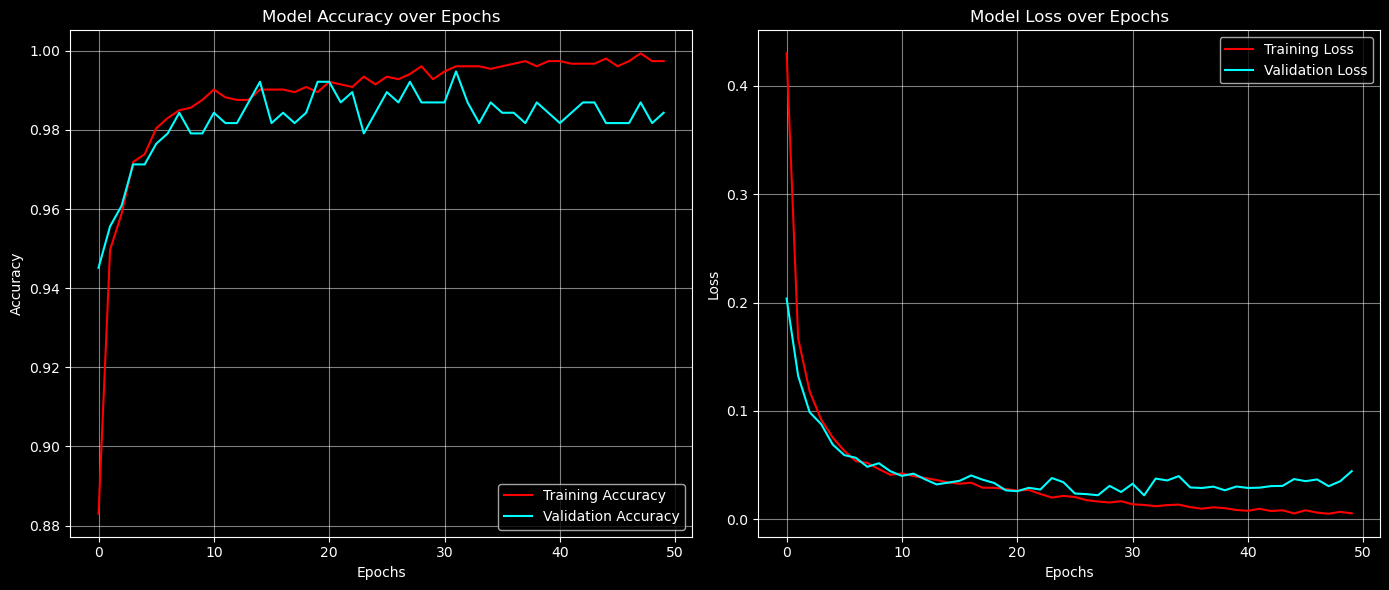

In [67]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label = "Training Accuracy", color = "red")
plt.plot(val_accuracy, label = "Validation Accuracy", color = "cyan")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Epochs")
plt.legend()

plt.grid(True, alpha = 0.5)

plt.subplot(1, 2, 2)
plt.plot(loss, label = "Training Loss", color = "red")
plt.plot(val_loss, label = "Validation Loss", color = "cyan")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss over Epochs")
plt.legend()

plt.grid(True, alpha = 0.5)

plt.tight_layout()
plt.show()

In [68]:
test_loss, test_acc = model3.evaluate(X_test_scaled3, y_test3)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

15/15 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9833
Test Loss: 0.09784000366926193
Test Accuracy: 0.9832985401153564


In [69]:
y_pred3 = model3.predict(X_test_scaled3)
y_pred_classes3 = y_pred3.argmax(axis = 1)

y_pred_labels = label_encoder.inverse_transform(y_pred_classes3)
y_test_labels = label_encoder.inverse_transform(y_test3)

print("Predicted vs Actual values:")
for pred, actual in zip(y_pred_labels, y_test_labels):
    print(f"Predicted: {pred}, Actual: {actual}")

15/15 [==============================] - 0s 1ms/step
Predicted vs Actual values:
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medi

### 15. Results

| Modelo  | Test Loss         | Test Accuracy      |
|---------|-------------------|--------------------|
| Modelo 1| 0.09637239575386047| 0.9791231751441956 |
| Modelo 2| 0.1204470545053482 | 0.9770354628562927 |
| Modelo 3| 0.08748580515384674| 0.9832985401153564 |


From the previous results I can conclude that the best model is Model 3 because it has the best accuracy, as well as a lower test loss.